## Assignment : Graphical Social Network analysis and ML 
Social network analysis is an example of a widely faced issue in data science industry. eg. paper citations. 
(in case there is a problem with getting the dataset, feel free to change the scenario to US government choosing potential immigrants to their country based on their social media authencity. We figured out a way to do that) : https://www.nytimes.com/2019/06/02/us/us-visa-application-social-media.html
Below we study a method to perform graphical network analysis and use them to create features for our learning. 

Dataset : http://snap.stanford.edu/data/ego-Facebook.html

* say you are in the recruiting team of a company. and your company needs to hire data scientists.
* Now since there are a lot of applicants, instead of going through their resumes (since all of the look the same anyway ;)), you plan on using their coorporate social media profile for finding the most "renowned" data scientists for your company. 
* Now, assume that luckily you also have data from linkedin with their connections and recommendations etc and you plan on doing some social network analysis. -- no data
-----------------------------------------------------------------------------------------------
##### Note : We will be using graph-tool for the demo. But you can feel free to use networkx (or any other tool) for graphical analysis
* check A8 for notes on introduction. 
* Create 4000 records atleast (70% training 30% test)
* Add noise to the data
* remove columns of connections

## Part 1: Centrality Measures

* The data collected from Facebook is spread out in two locations : 
       * facebook_data.csv : 
       * edges.csv : 
We first need to read the data in pandas DataFrame and then implement algorithms related to centrality measures (elaborate) to understand the importance in graphical analysis for social media. 

In [22]:
from networkx import *
import os
import pandas as pd
import matplotlib.pyplot as plt
#from graph_tool.all import *

source = "data/"
df = pd.read_csv(source+"edges.csv")
'''
for f in fs:
    with open(source+f,'r') as fopen:
        temp = pd.read_csv(fopen,sep=" ",header=None)
        fopen.close()
        df = pd.concat([temp,df])
'''
df.head(10)

,node0,node1
0,881,858
1,828,697
2,884,864
3,856,869
4,889,856
5,872,873
6,719,713
7,861,863
8,840,803
9,864,856


As a part of the first task, create a graph from the first `100` entries of the dataframe and save the image as A.png. Now, for every node find the number of adjacent nodes to each nodes and display the top 100 nodes with highest number of neighbors. Save this image as B.png

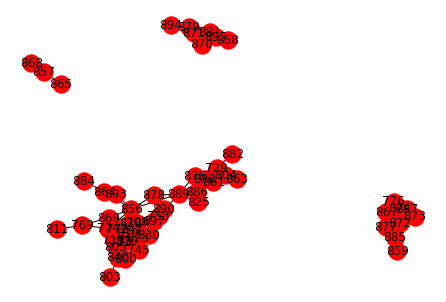

In [33]:
g= Graph(directed=True)
for i,rows in df.head(100).iterrows():
    g.add_edge(rows[0],rows[1])
draw(g, with_labels=True)

In [30]:
def get_friends(node):
    return len([p for p in g.neighbors(node)])

### Task 1a: Shortest Path and Degree Centrality

In [26]:
n_spaths = dict.fromkeys(g,0.0)
s= dict(all_pairs_shortest_path(g))
#print([p for p in s])
for source in g:
        for path in s[source].values():
            for node in path[1:]: # ignore firs element (source == node)
                n_spaths[node] += 1 # this path passes through `node`
        
print(n_spaths)

{881: 20.0, 858: 6.0, 828: 82.0, 697: 63.0, 884: 36.0, 864: 106.0, 856: 608.0, 869: 133.0, 889: 574.0, 872: 28.0, 873: 16.0, 719: 121.0, 713: 57.0, 861: 102.0, 863: 36.0, 840: 108.0, 803: 36.0, 745: 50.0, 805: 96.0, 865: 2.0, 857: 4.0, 874: 18.0, 708: 84.0, 823: 138.0, 885: 26.0, 870: 8.0, 871: 10.0, 888: 216.0, 825: 36.0, 774: 228.0, 729: 114.0, 769: 106.0, 800: 36.0, 819: 50.0, 859: 8.0, 876: 36.0, 887: 14.0, 895: 10.0, 890: 36.0, 810: 120.0, 879: 20.0, 753: 183.0, 830: 58.0, 747: 131.0, 776: 8.0, 772: 78.0, 804: 38.0, 886: 36.0, 893: 36.0, 811: 36.0, 867: 14.0, 868: 2.0, 878: 36.0, 877: 12.0, 882: 36.0, 894: 6.0}



Find the betweenness centrality for each connection.
    ----- Include the story behind using betweeness centrality. Save the image created (as A.png, will be used for submission later)
    ----- Show them in a graphical format. (check how to make a graphical structure from networkx package.)
    ----- include the code snippet that does the calculation if required using the networkx pkg
https://en.wikipedia.org/wiki/Betweenness_centrality

In [17]:
###### WRITE UR CODE HERE ############
def get_betweenness_centrality(G):
    """Compute the shortest-path betweenness centrality for nodes. 
    Args 
    ---------- 
    G : graph 
      A NetworkX graph. 
      
    normalized : bool, optional 
      If True the betweenness values are normalized by `2/((n-1)(n-2))` 
      for graphs, and `1/((n-1)(n-2))` for directed graphs where `n` 
      is the number of nodes in G. 
  
    Returns 
    ------- 
    nodes : dictionary 
       Dictionary of nodes with betweenness centrality as the value.       
    """
    nodes = G.nodes()
    for s in nodes: 
        P = single_source_dijkstra_path(G, s, 1) 
        betweenness = accumulate_basic(betweenness, S, P, sigma, s) 

    betweenness = _rescale(betweenness, len(G), directed=G.is_directed()) 
    return betweenness

b = get_betweenness_centrality(g)
for i in b.keys():
    print("{} {}".format(i,b[i]))

NameError: name 'accumulate_basic' is not defined

In [28]:
### Find betweenness centrality
bet = betweenness_centrality(g, normalized=False)
for i in bet.keys():
    print("{} {}".format(i,bet[i]))
    
### Find degree centrality    
#deg = degree_centrality(g)
#for i in deg.keys():
    #print("{} {}".format(i,deg[i]))

### Find eigen centrality    
#eig = eigenvector_centrality(g)
#for i in eig.keys():
    #print("{} {}".format(i,eig[i]))

881 7.0
858 0.0
828 31.707142857142856
697 16.037301587301588
884 0.0
864 35.0
856 266.93809523809523
869 29.09285714285714
889 267.20952380952383
872 7.666666666666667
873 1.4166666666666667
719 36.03571428571429
713 7.687301587301586
861 66.6666666666667
863 0.0
840 35.56111111111112
803 0.0
745 4.385714285714284
805 20.84761904761904
865 0.0
857 1.0
874 4.333333333333333
708 49.33253968253968
823 65.45634920634922
885 9.083333333333334
870 1.0
871 2.0
888 34.999999999999986
825 0.0
774 73.82857142857141
729 38.0
769 35.0
800 0.4333333333333333
819 8.519047619047619
859 0.0
876 20.000000000000007
887 3.6666666666666665
895 2.0
890 0.0
810 47.615079365079346
879 7.0
753 97.02222222222223
830 15.52777777777777
747 31.98730158730158
776 1.0833333333333333
772 34.44206349206349
804 2.6666666666666665
886 0.0
893 0.0
811 0.0
867 4.833333333333333
868 0.0
878 0.0
877 3.9166666666666665
882 0.0
894 0.0


### Task 2: EighenVector Centrality
As we saw, computing shortest paths is kind of a pain. For this reason, betweenness and closeness centrality aren’t often used on large networks. The less intuitive (but generally easier to compute) eigenvector centrality is more frequently used. even the Find the eighenvector centrality for each connection. 
    -----  Include the story behind using eighenvector centrality. Save the image created (as B.png, will be used for submission later)
    ----- Show them in a graphical format. (check how to make a graphical structure from networkx package.) 
    ----- include the code snippet that does the calculation if required using the networkx pkg

In [ ]:
def get_eigenvector_centrality(G, max_iter=100, tol=1.0e-6, nstart=None, 
                           weight='weight'): 
    """Compute the eigenvector centrality for the graph G. 
  
    Eigenvector centrality computes the centrality for a node based on the 
    centrality of its neighbors. The eigenvector centrality for node `i` is 
  
    .. math:: 
  
        \mathbf{Ax} = \lambda \mathbf{x} 
  
    where `A` is the adjacency matrix of the graph G with eigenvalue `\lambda`. 
    By virtue of the Perron–Frobenius theorem, there is a unique and positive 
    solution if `\lambda` is the largest eigenvalue associated with the 
    eigenvector of the adjacency matrix `A` ([2]_). 
  
    Parameters 
    ---------- 
    G : graph 
      A networkx graph 
  
    max_iter : integer, optional 
      Maximum number of iterations in power method. 
  
    tol : float, optional 
      Error tolerance used to check convergence in power method iteration. 
  
    nstart : dictionary, optional 
      Starting value of eigenvector iteration for each node. 
  
    weight : None or string, optional 
      If None, all edge weights are considered equal. 
      Otherwise holds the name of the edge attribute used as weight. 
  
    Returns 
    ------- 
    nodes : dictionary 
       Dictionary of nodes with eigenvector centrality as the value. 
  
        
    Notes 
    ------ 
    The eigenvector calculation is done by the power iteration method and has 
    no guarantee of convergence. The iteration will stop after ``max_iter`` 
    iterations or an error tolerance of ``number_of_nodes(G)*tol`` has been 
    reached. 
  
    For directed graphs this is "left" eigenvector centrality which corresponds 
    to the in-edges in the graph. For out-edges eigenvector centrality 
    first reverse the graph with ``G.reverse()``. 
  
     
    """
    from math import sqrt 
    if type(G) == nx.MultiGraph or type(G) == nx.MultiDiGraph: 
        raise nx.NetworkXException("Not defined for multigraphs.") 
  
    if len(G) == 0: 
        raise nx.NetworkXException("Empty graph.") 
  
    if nstart is None: 
  
        # choose starting vector with entries of 1/len(G) 
        x = dict([(n,1.0/len(G)) for n in G]) 
    else: 
        x = nstart 
  
    # normalize starting vector 
    s = 1.0/sum(x.values()) 
    for k in x: 
        x[k] *= s 
    nnodes = G.number_of_nodes() 
  
    # make up to max_iter iterations 
    for i in range(max_iter): 
        xlast = x 
        x = dict.fromkeys(xlast, 0) 
  
        # do the multiplication y^T = x^T A 
        for n in x: 
            for nbr in G[n]: 
                x[nbr] += xlast[n] * G[n][nbr].get(weight, 1) 
  
        # normalize vector 
        try: 
            s = 1.0/sqrt(sum(v**2 for v in x.values())) 
  
        # this should never be zero? 
        except ZeroDivisionError: 
            s = 1.0
        for n in x: 
            x[n] *= s 
  
        # check convergence 
        err = sum([abs(x[n]-xlast[n]) for n in x]) 
        if err < nnodes*tol: 
            return x 
  
    raise nx.NetworkXError("""eigenvector_centrality(): power iteration failed to converge in %d iterations."%(i+1))""")

Add the three parameters found above closeness_centrality, betweenness_centrality and eighenvector_centrality to the file `facebook_info.csv` . This file will be used later for Task 3. 

## Part 2: Modelling and Parameter Tuning in Spark
### Task 3a:  Cross Validation
Now as a part of this step, we expect you to use the above two created fields and use it one by one (along with original fields in the dataset) to train any of the three machine learning models (we studied) based on ones you think will be suitable for the problem set and compare the results. Based on the results obtained. Answer the questions below and submit the answer file as answer.txt. Remember to not exceed more than 3 sentences for each question.

Hint: https://spark.apache.org/docs/latest/ml-tuning.html
https://rawgit.com/sfu-db/bigdata-cmpt733/master/Assignments/A5/A5.html

### Task 3b: Train Validation Split

### Task 4 :
   * q1) Which 3 models did you choose and why? Explain reasons behind chosing these 3 ML models.
   * q2) Compare the performance of these three models and explain. Why do you think you get such results. 
   * q3) What is the evaluation method you used?
   * q4) Do you think adding the inferential feature vectors (Betweeness and eighenvector) for centrality was a good idea and why? Can you think of a different approach for solving this problem (other than Social Network Graphical analysis)

Submit all the files in a zipped format under Coursys.

### Dataset Locations (potential links) :-
* https://github.com/awesomedata/awesome-public-datasets
  * https://github.com/awesomedata/awesome-public-datasets#complexnetworks
  * https://github.com/awesomedata/awesome-public-datasets#socialnetworks
  * https://github.com/awesomedata/awesome-public-datasets#searchengines
  * http://www-personal.umich.edu/~mejn/netdata/
  * https://www.kdnuggets.com/2014/08/interesting-social-media-datasets.html+
  * google keyword (awesome public datasets social network)
  * http://snap.stanford.edu/data/